<a href="https://colab.research.google.com/github/forodie/MachineLearning-Homework/blob/main/ML_SF_CRIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# San Francisco Crime Classification

#  Описание задачи

В этом наборе данных представлены почти 12-летние отчеты о преступлениях во всех районах Сан-Франциско - от Сансета до SOMA, от Марины до Эксельсиора.

Задача состоит в "классификации преступности в Сан-Франциско".

Цели, стоящие перед организаторами конкурса, в котором предъявлен датасет:
1. Предсказать категорию преступления по имеющейся информации местоположения и времени.
2. Визуализировать данные: город и преступления.

Датасет имеет следующие переменные:
1. Dates - временная метка о преступлении
2. Category - категория преступления (только в обучающей выборке)
3. Descript - подробное описание преступления (только в обучающей выборке)
4. DayOfWeek - день недели
5. PdDistrict - название района, в котором расположен полицейский департамент
6. Resolution - описание разрешения конфликта (только в обучающей выборке)
7. Address - приблизительный адрес улицы, на котором произошло преступление
8. X - Долгота
9. Y - Широта

Некоторый комментарий к реализации:
Вся работа будет проходить с файлом train.csv. В дальнейшем его будем разбивать на обучающую и тестовую выборку. Поскольку классов 39, то некоторые по смыслу в дальнейшем определим в 5-6 классов.

# Чтение данных

In [1]:
# Необходимые библиотеки
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import defaultdict

In [2]:
# Загрузка данных
url = 'train.csv' # Файл с данными должен лежать в папке с проектом
data = pandas.read_csv('/content/drive/MyDrive/Utkin German (ML) /train.csv')
data.shape

(878049, 9)

Датасет содержит информацию о 878049 объектах, имеющих 9 признаков, два из которых относятся к обучающей выборке.

In [3]:
data['latlong'] = data['X'] * data['Y']
data

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  \
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414   
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873   
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541   
...                ...                         ...         ...        ...   
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056   
878045            NONE        600 Block of EDNA ST -122.447364  37.731948   
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266   
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607   
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212   

            latlong  
0      -4624.588916  
1      -4624.588916  
2      -4627.691645  
3      -4627.847257  
4      -4624.699819  
...             ...  
878044 -4618.426865  
878045 -4620.177499  
878046 -4624.432596  
878047 -4623.988577  
878048 -4618.965598  

[878049 rows x 10 columns]

In [4]:
print(data.columns)
print(data.isnull().sum())

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'latlong'],
      dtype='object')
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
latlong       0
dtype: int64


In [5]:
data['latlong'] = data['latlong'].astype('float64')
data['latlong'].dtype

dtype('float64')

In [6]:
data['Category'] = data['Category'].astype('category')
data['Category'].dtype

CategoricalDtype(categories=['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
                  'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
                  'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
                  'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD',
                  'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS',
                  'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL',
                  'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION',
                  'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
                  'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
                  'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA',
                  'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS',
                  'WEAPON LAWS'],
, ordered=False)

In [7]:
data['Resolution'] = data['Resolution'].astype('category')
data['Resolution'].dtype

CategoricalDtype(categories=['ARREST, BOOKED', 'ARREST, CITED',
                  'CLEARED-CONTACT JUVENILE FOR MORE INFO',
                  'COMPLAINANT REFUSES TO PROSECUTE',
                  'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
                  'EXCEPTIONAL CLEARANCE', 'JUVENILE ADMONISHED',
                  'JUVENILE BOOKED', 'JUVENILE CITED', 'JUVENILE DIVERTED',
                  'LOCATED', 'NONE', 'NOT PROSECUTED',
                  'PROSECUTED BY OUTSIDE AGENCY',
                  'PROSECUTED FOR LESSER OFFENSE', 'PSYCHOPATHIC CASE',
                  'UNFOUNDED'],
, ordered=False)

In [8]:
data['Descript'] = data['Descript'].astype('category')
data['Descript'].dtype

CategoricalDtype(categories=['ABANDONMENT OF CHILD', 'ABORTION',
                  'ACCESS CARD INFORMATION, PUBLICATION OF',
                  'ACCESS CARD INFORMATION, THEFT OF', 'ACCIDENTAL BURNS',
                  'ACCIDENTAL SHOOTING', 'ACTS AGAINST PUBLIC TRANSIT',
                  'ADVERTISING DISTRIBUTORS PERMIT VIOLATION',
                  'AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF',
                  'AFFIXING ADVERTISMENTS TO POLES',
                  ...
                  'WEAPON, DEADLY, CARRYING WITH INTENT TO COMMIT ASSAULT',
                  'WEAPON, DEADLY, EXHIBITING TO RESIST ARREST',
                  'WEAPON, POSSESS OR BRING OTHER ON SCHOOL GROUNDS',
                  'WEAPON, POSSESSING IN PUBLIC BUILDING OR OPEN MEETING',
                  'WEAPON, TAKING OR ATTEMPTING TO TAKE FROM PEACE OFFICER',
                  'WEAPONS POSSESSION BY JUVENILE SUSPECT',
                  'WEARING MASK OR DISGUISE FOR UNLAWFUL PURPOSE',
                  'WEARING 

In [9]:
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['DayOfWeek'].dtype

CategoricalDtype(categories=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
                  'Tuesday', 'Wednesday'],
, ordered=False)

In [10]:
data['PdDistrict'] = data['PdDistrict'].astype('category')
data['PdDistrict'].dtype

CategoricalDtype(categories=['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN',
                  'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'],
, ordered=False)

# Визуализация данных и вычисление основных характеристик

In [11]:
data.describe()

X              Y        latlong
count  878049.000000  878049.000000  878049.000000
mean     -122.422616      37.771020   -4624.019374
std         0.030354       0.456893      54.425087
min      -122.513642      37.707879  -10845.000000
25%      -122.432952      37.752427   -4625.502663
50%      -122.416420      37.775421   -4624.481415
75%      -122.406959      37.784369   -4621.771894
max      -120.500000      90.000000   -4614.972411

- count — количество значений для каждого признака
- mean — среднее значение
- std — стандартное отклонение, значение которого показывает, на сколько в среднем отклоняются варианты от среднего значения
- min — минимальное значение
- 25% — значения, которые объект не превышает с вероятностью 25%
- 50% — медиана, то есть значения, которые объект не превышает с вероятностью 25%
- 75% — значения, которые объект не превышает с вероятностью 75%
max — максимальное значение

In [12]:
data.describe(include=['category'])

Category                      Descript DayOfWeek PdDistrict  \
count          878049                        878049    878049     878049   
unique             39                           879         7         10   
top     LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Friday   SOUTHERN   
freq           174900                         60022    133734     157182   

       Resolution  
count      878049  
unique         17  
top          NONE  
freq       526790

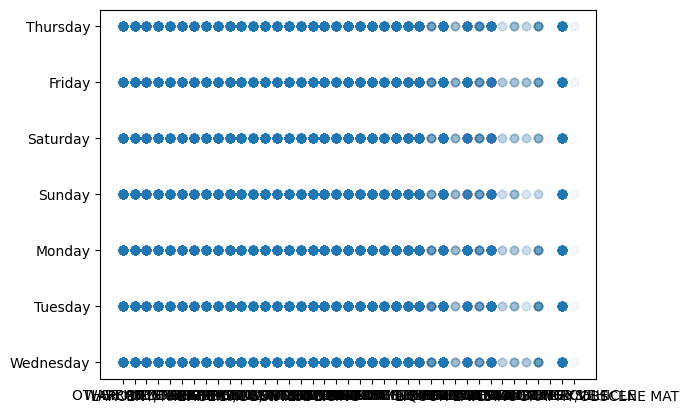

In [13]:
pyplot.scatter(data['Category'], data['DayOfWeek'], alpha=0.01)
pass

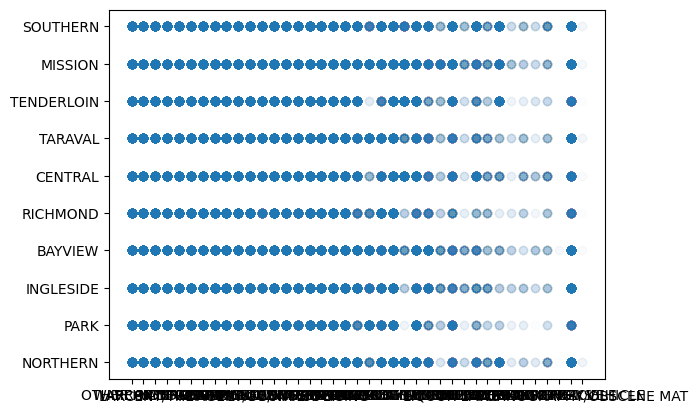

In [14]:
pyplot.scatter(data['Category'], data['PdDistrict'], alpha=0.01)
pass

<ipython-input-15-2d405204a5c0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  pyplot.style.use('seaborn')


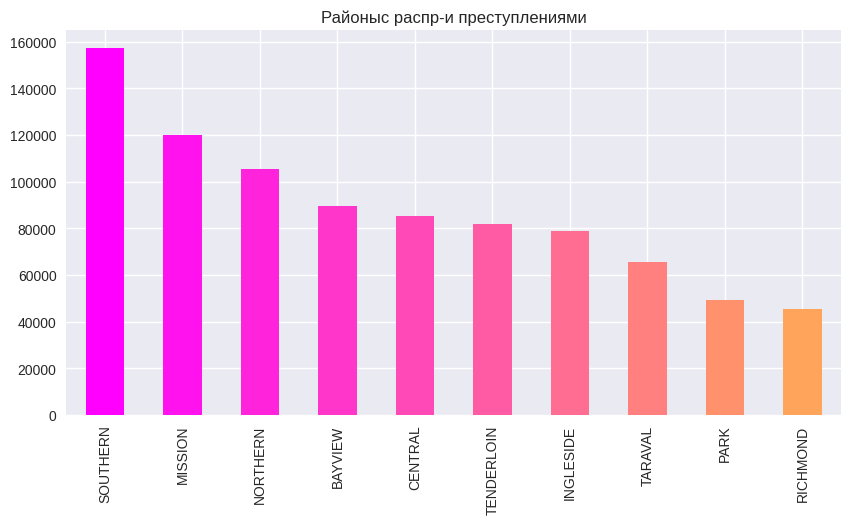

In [15]:
pyplot.rcParams['figure.figsize'] = (20, 9)
pyplot.style.use('seaborn')

color = pyplot.cm.spring(np.linspace(0, 1, 15))
data['PdDistrict'].value_counts().plot.bar(color = color, figsize = (10, 5))

pyplot.title('Районыс распр-и преступлениями',fontsize = 12)

pyplot.xticks(rotation = 90)
pyplot.show()

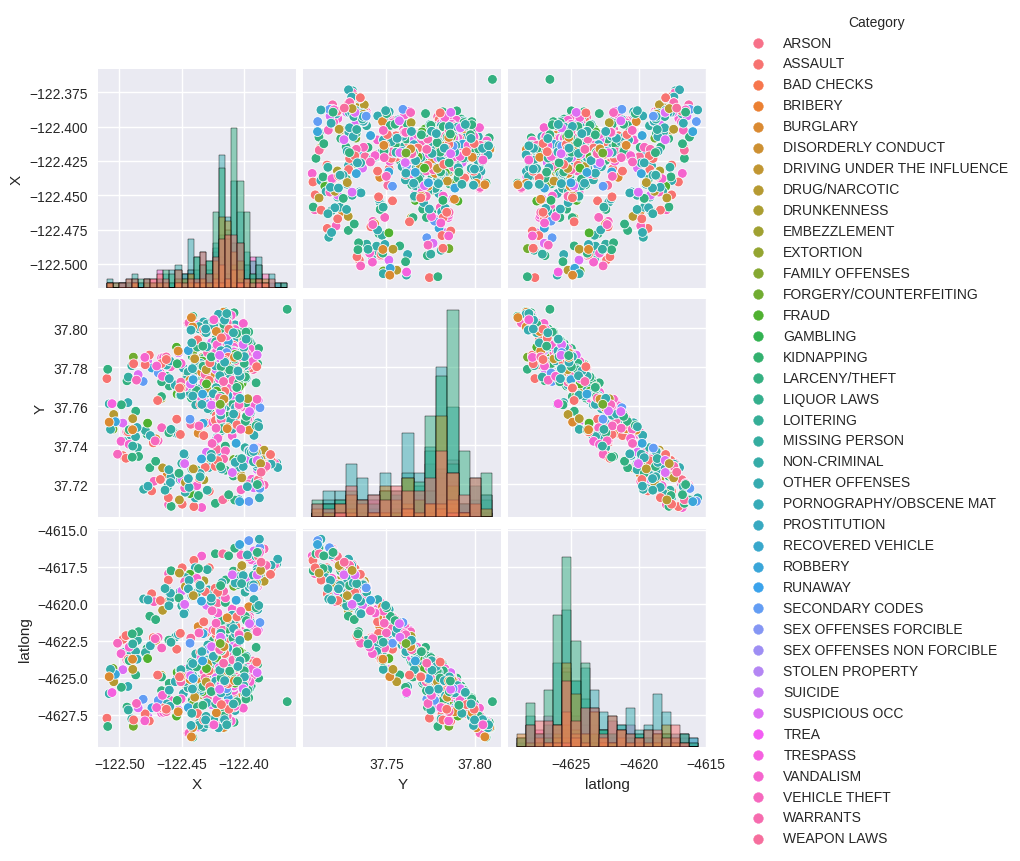

In [16]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='Category', diag_kind='hist')
pyplot.legend()
pass

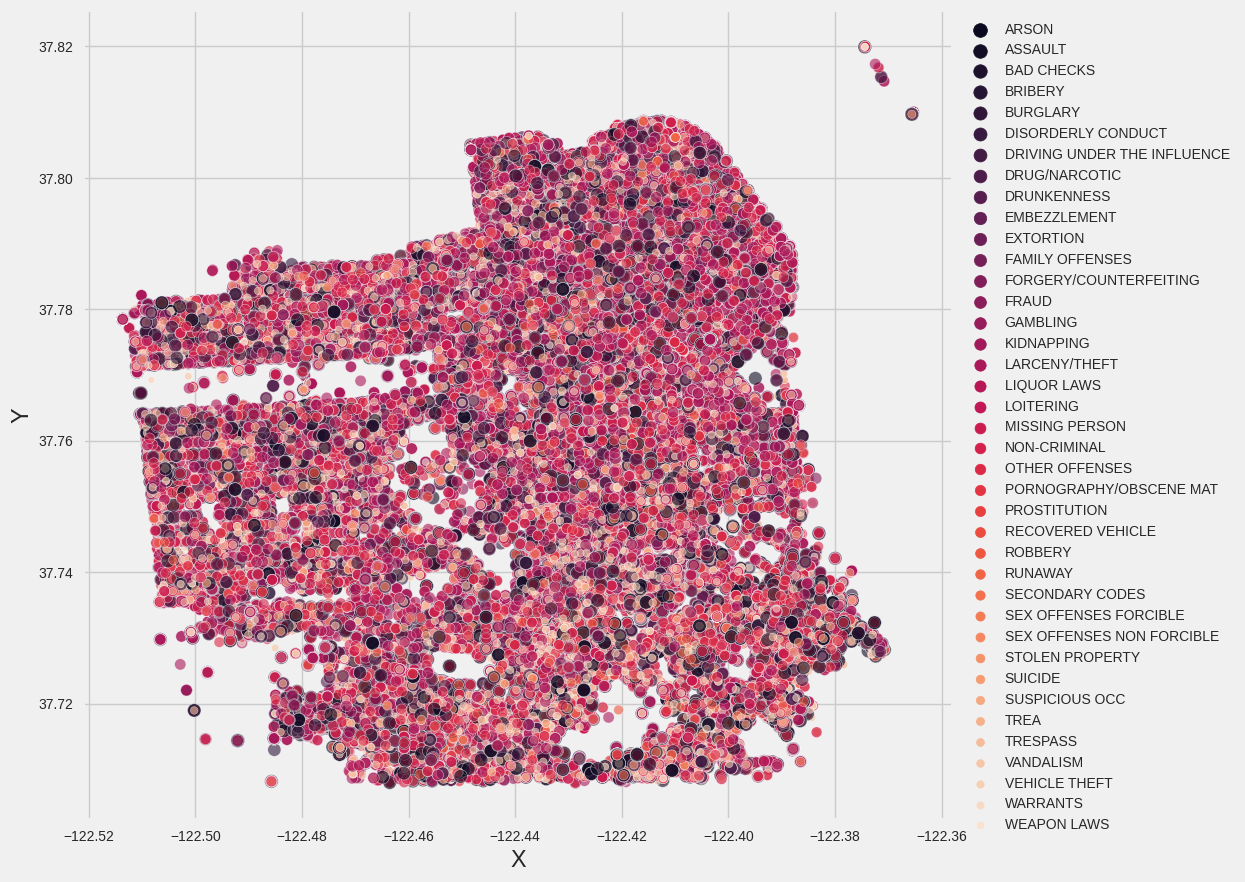

In [17]:
with pyplot.style.context('fivethirtyeight'):
    fig, ax = pyplot.subplots(1, 1, figsize=(10, 10))
    sns.scatterplot(data = data.iloc[:250000], x='X', y='Y', alpha=0.6, palette='rocket', hue='Category', size='Category')
    pyplot.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

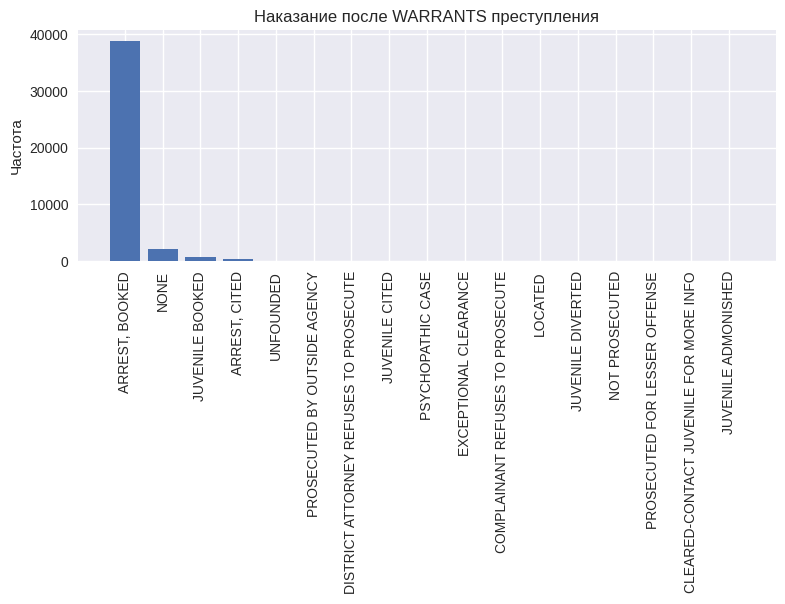

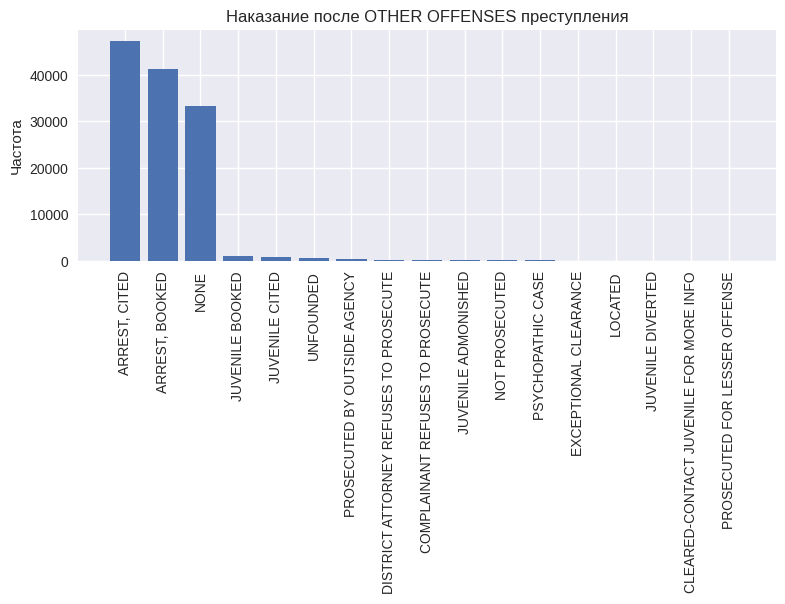

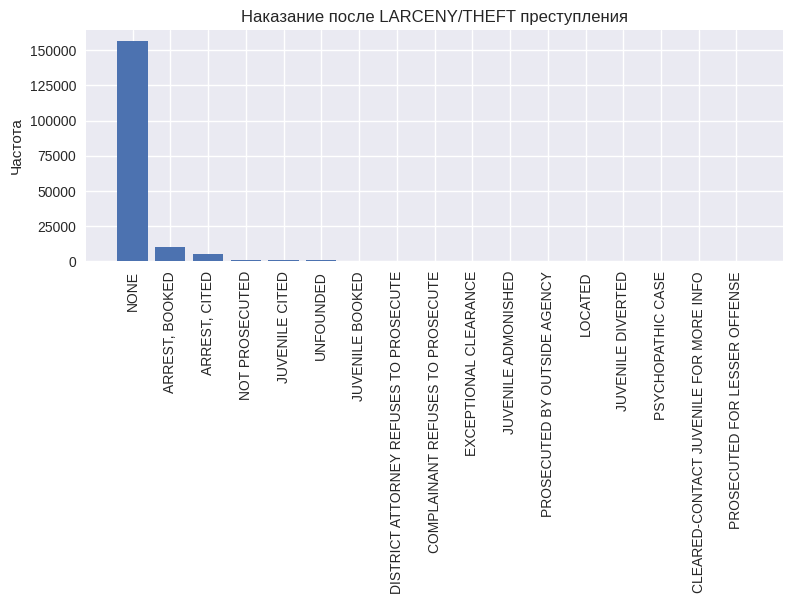

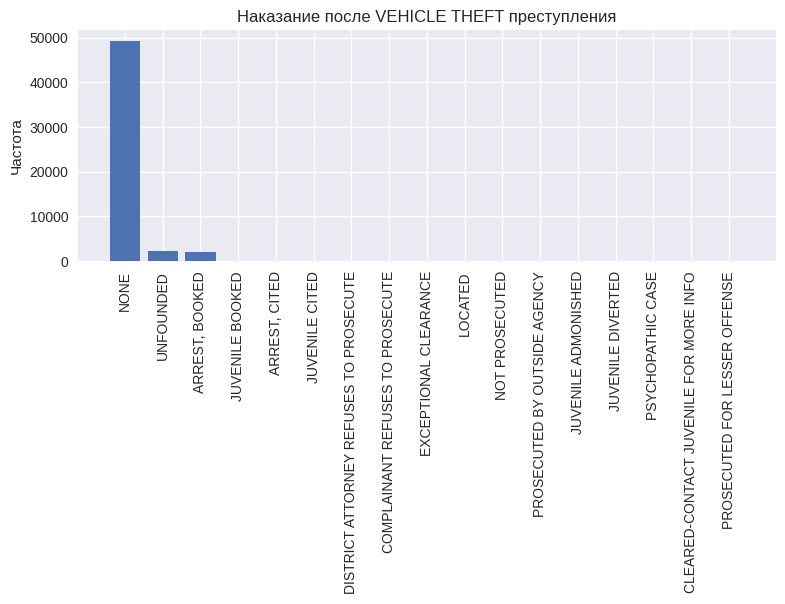

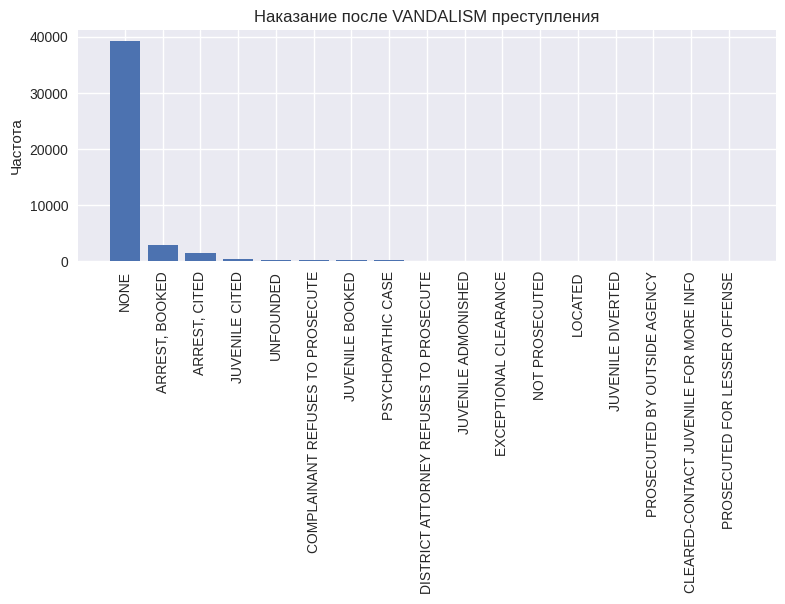

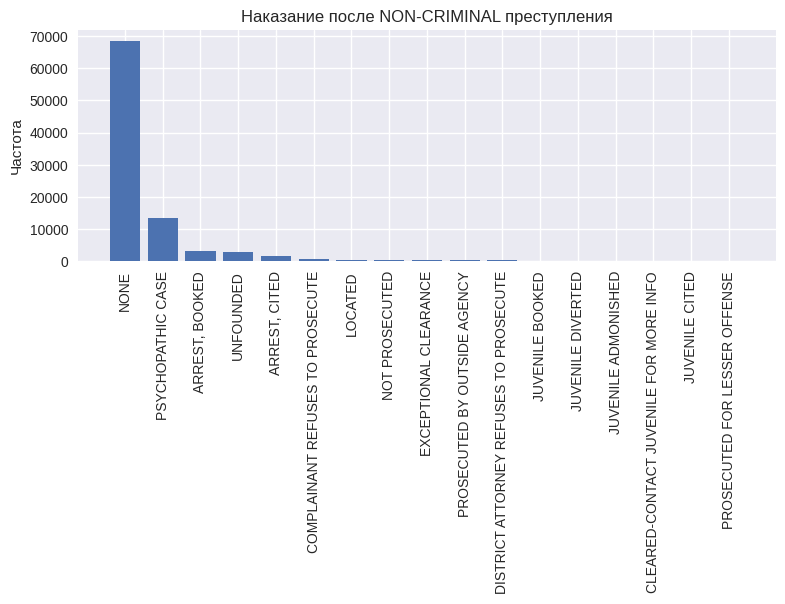

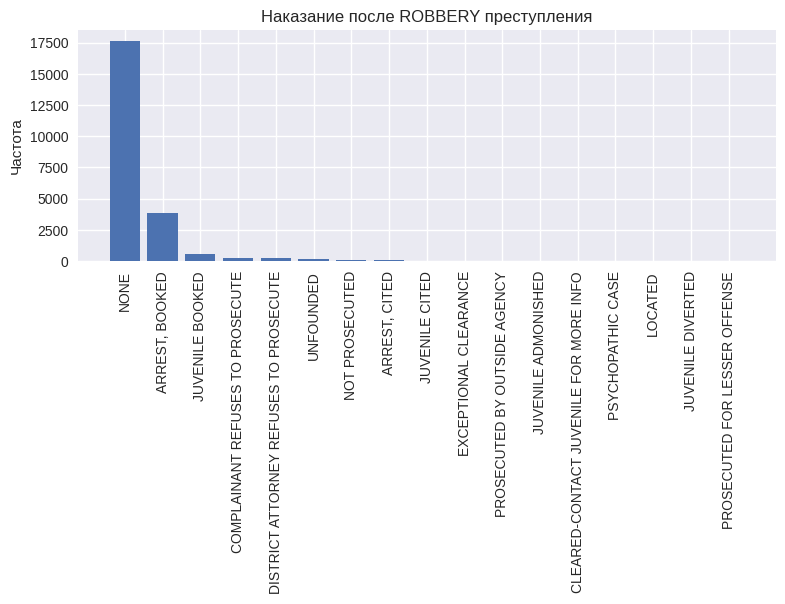

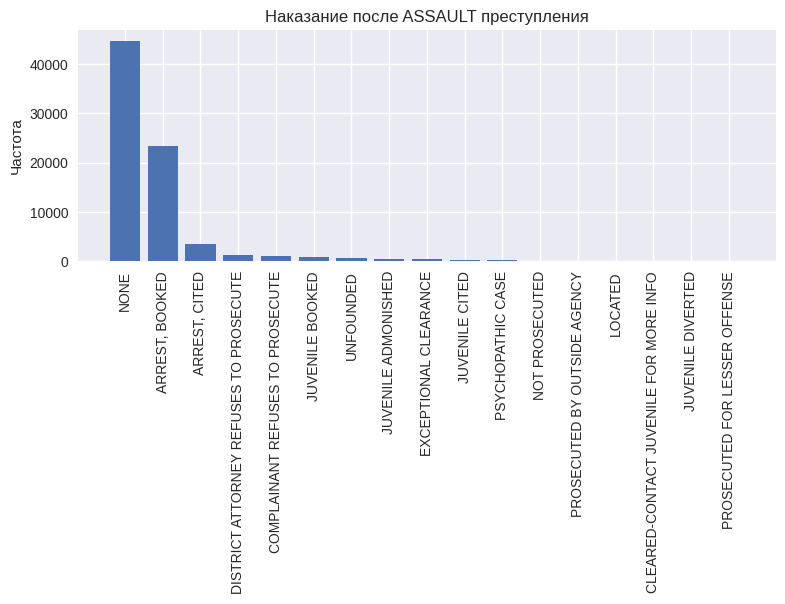

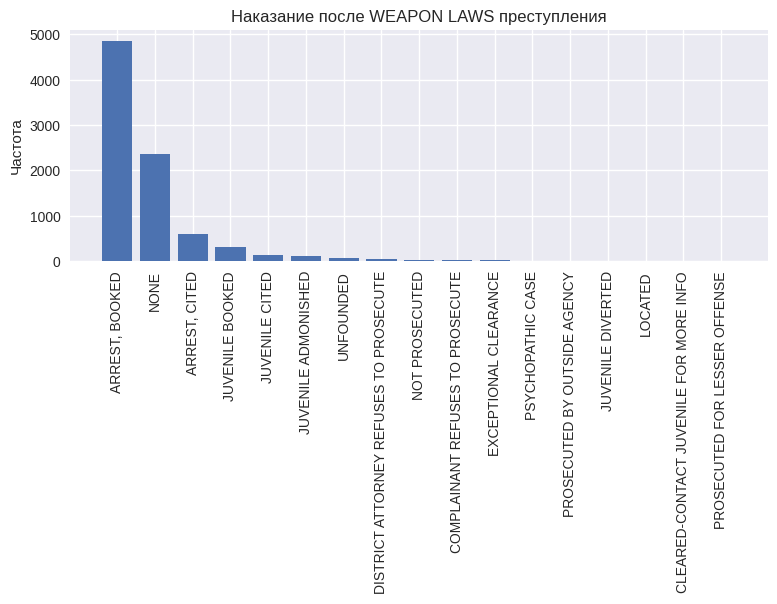

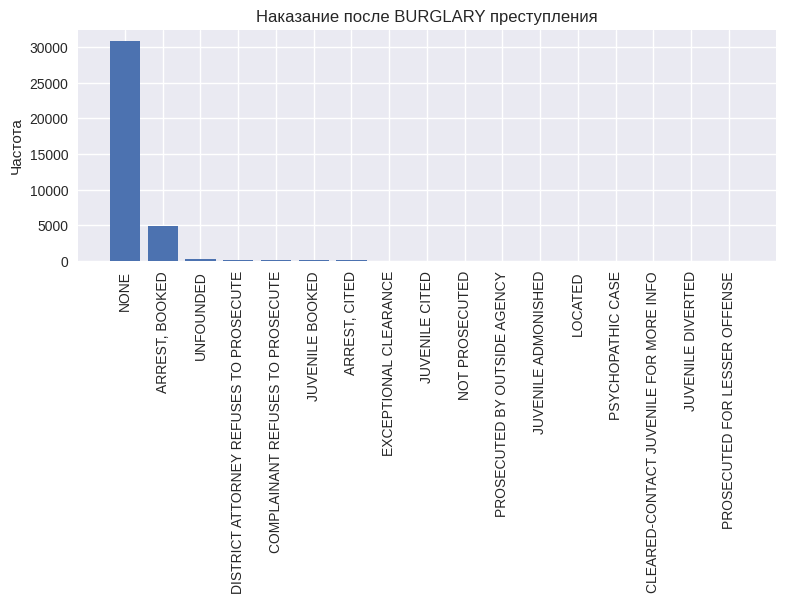

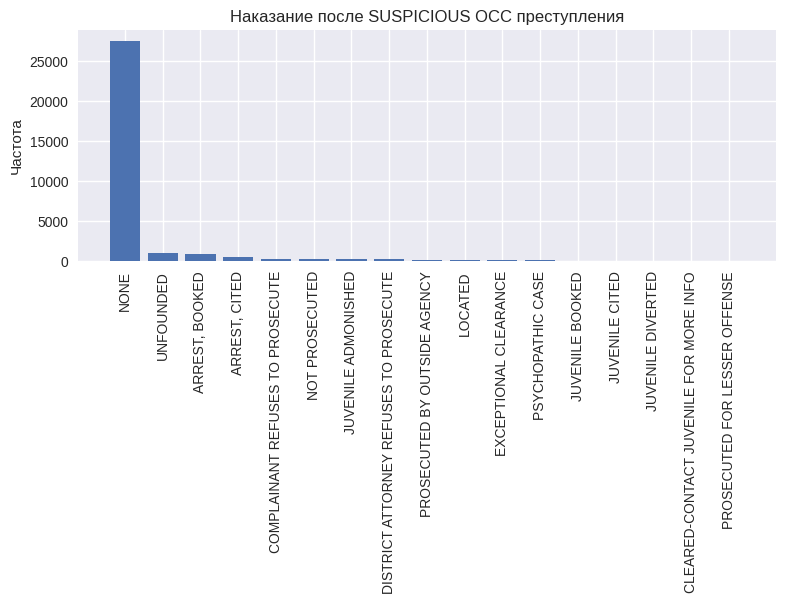

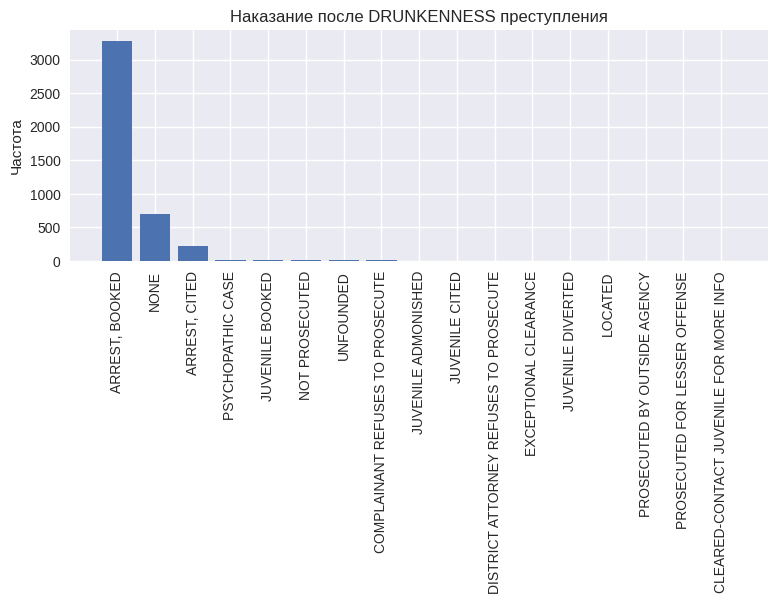

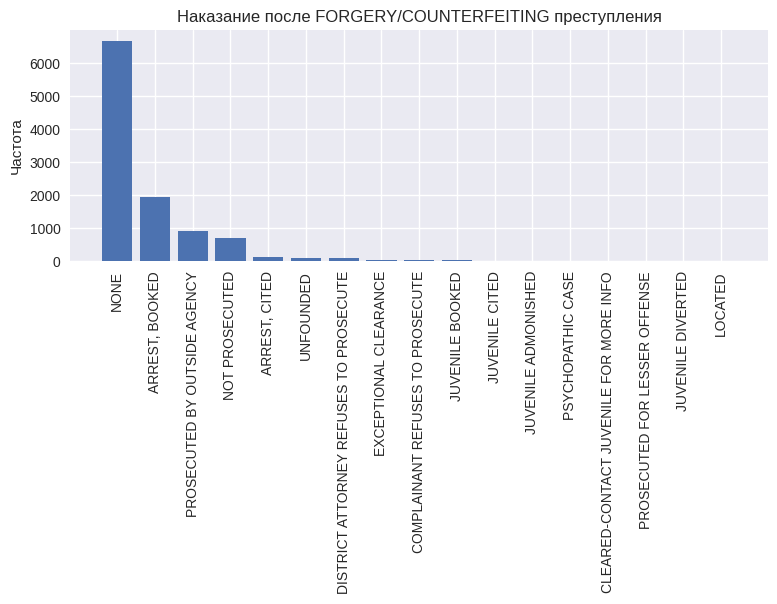

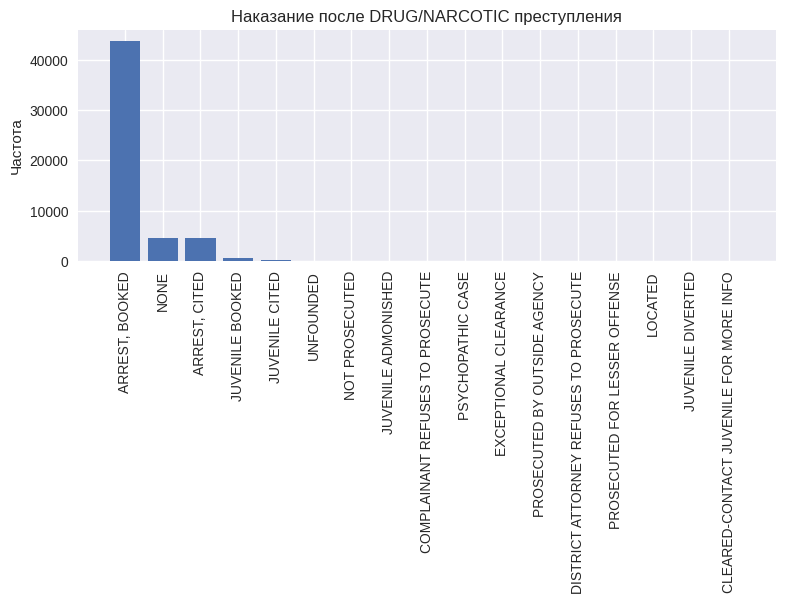

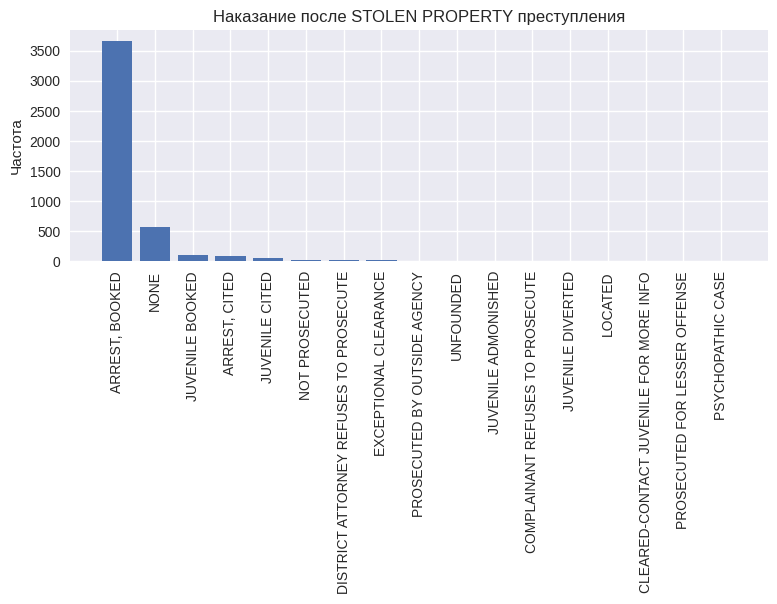

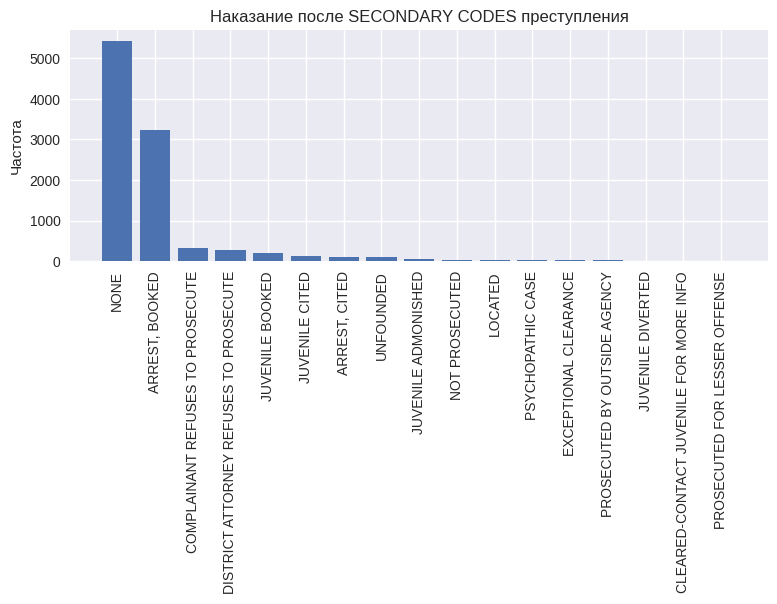

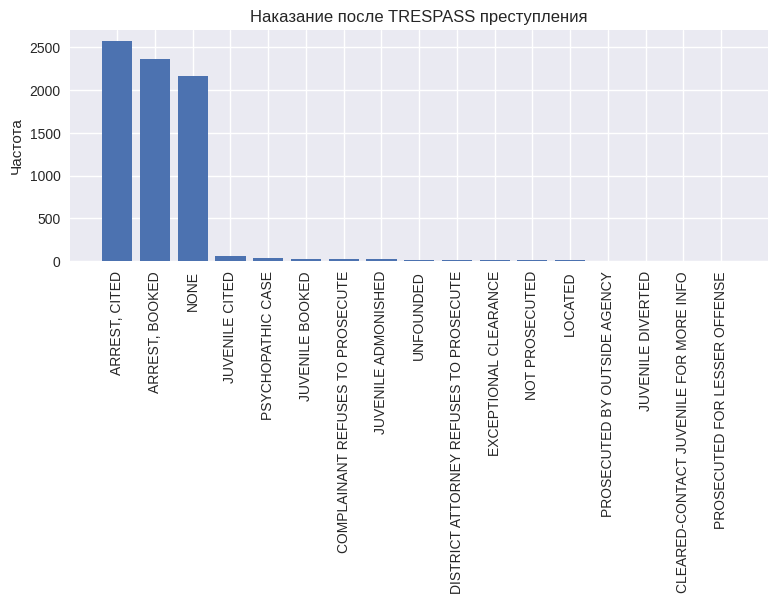

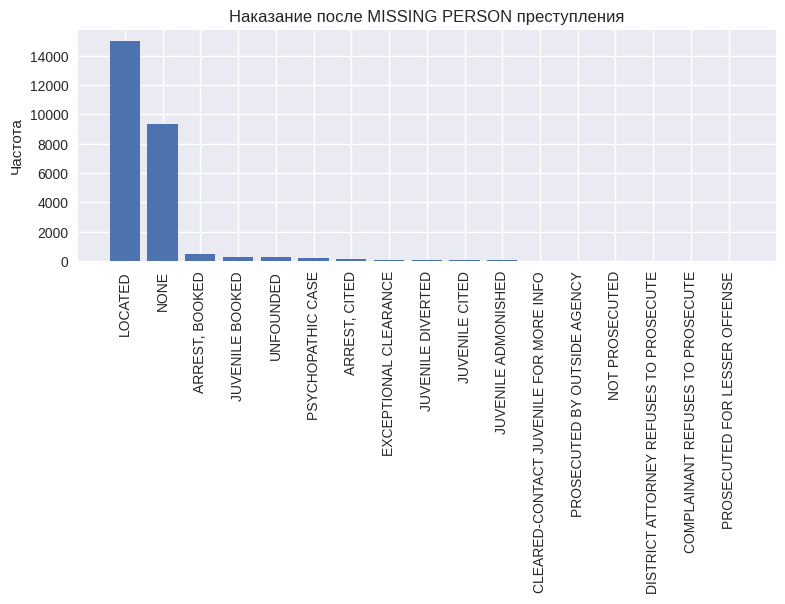

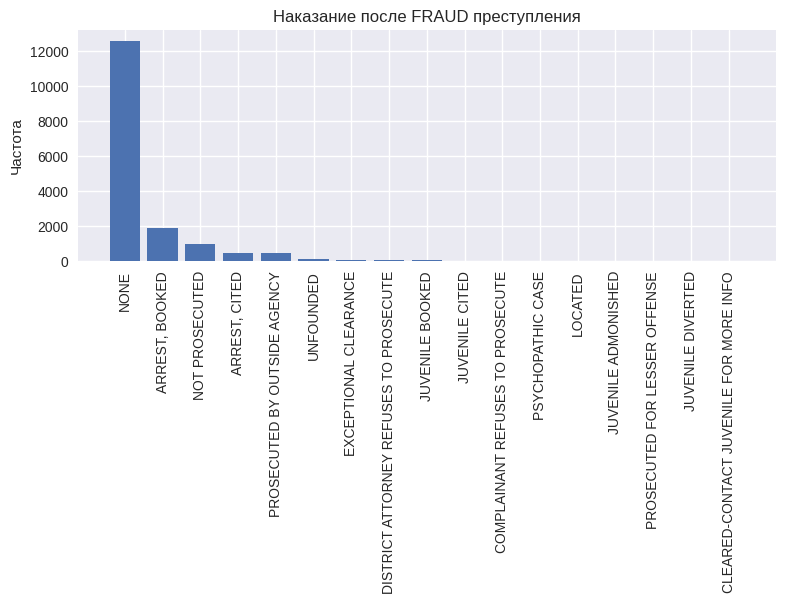

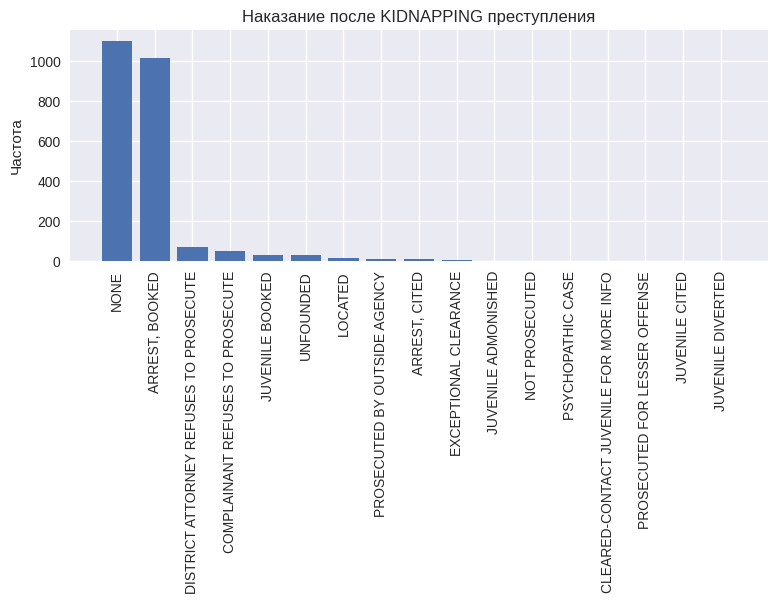

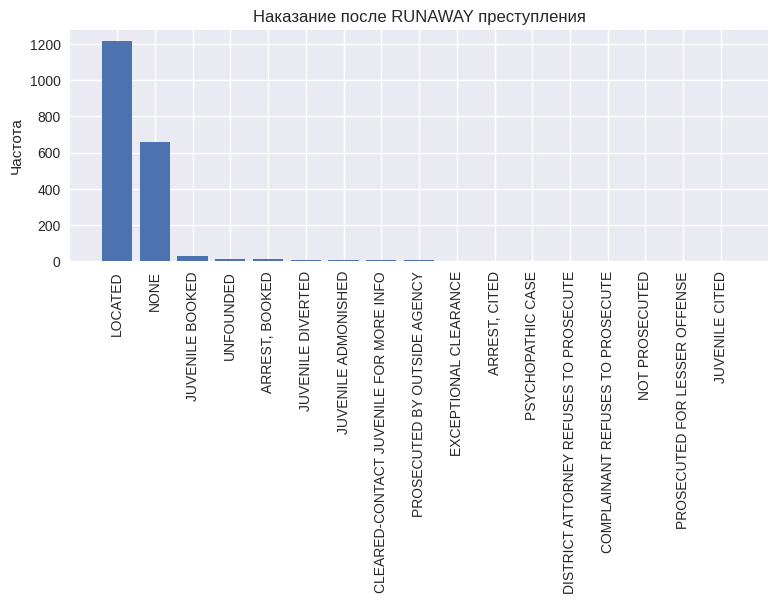

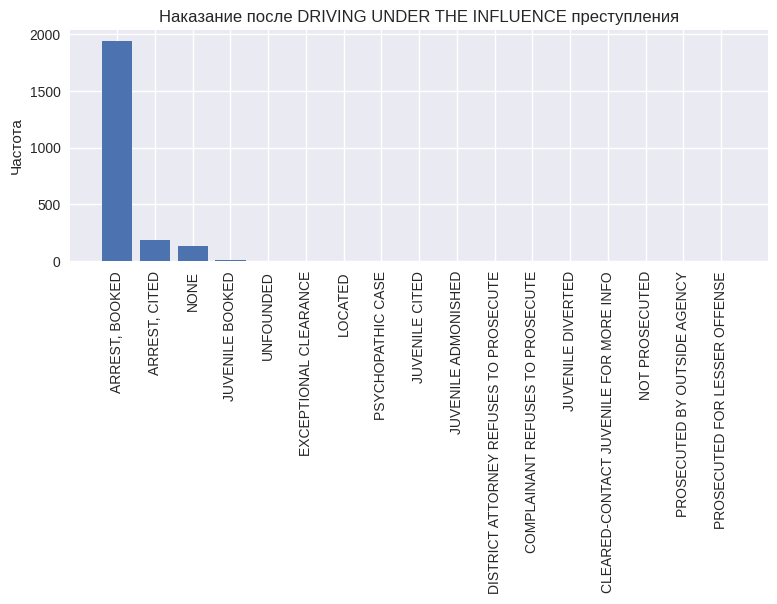

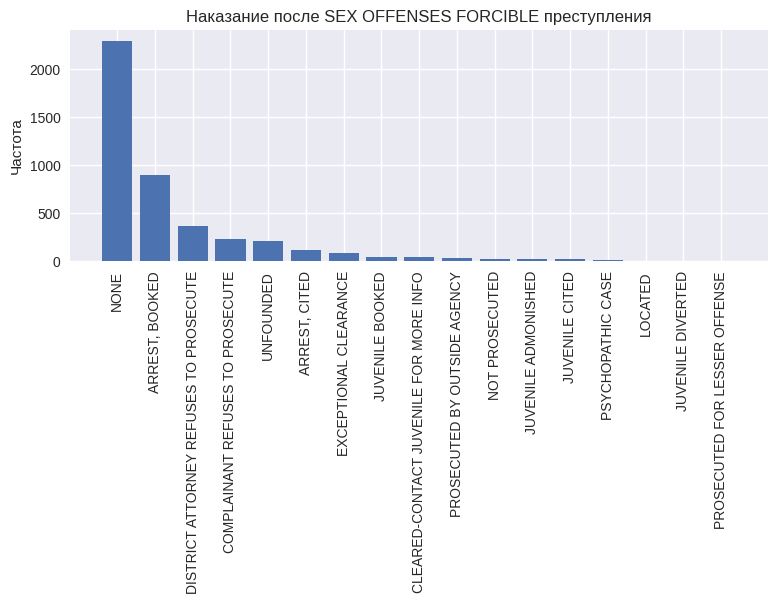

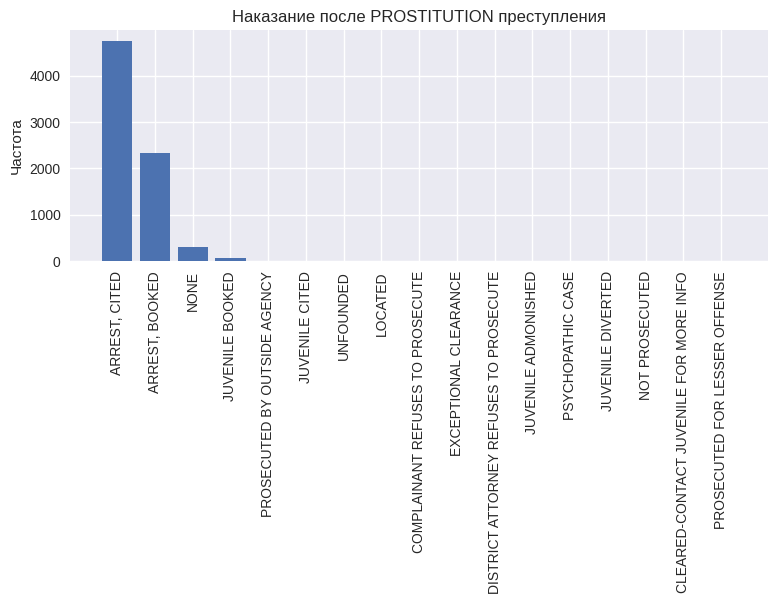

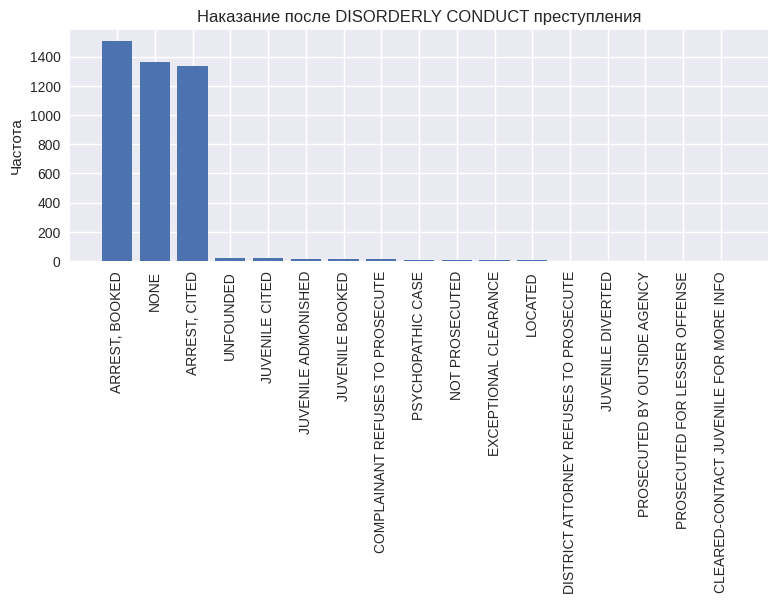

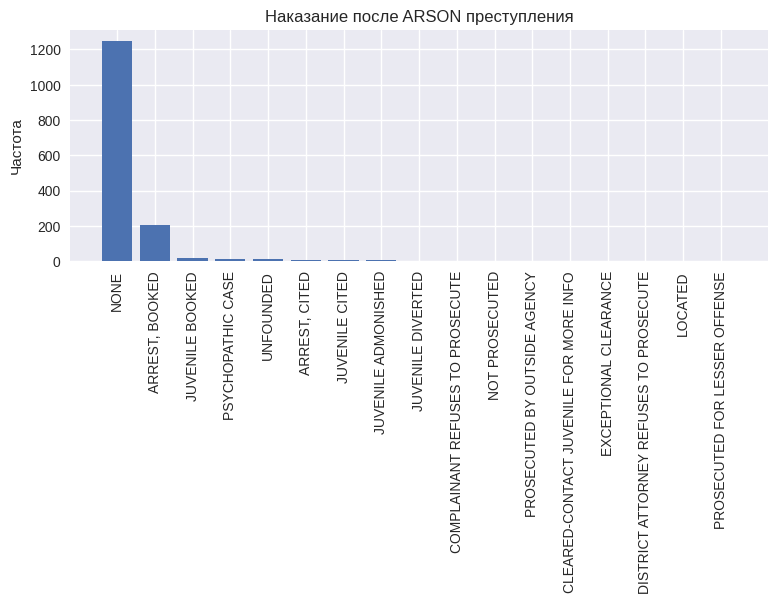

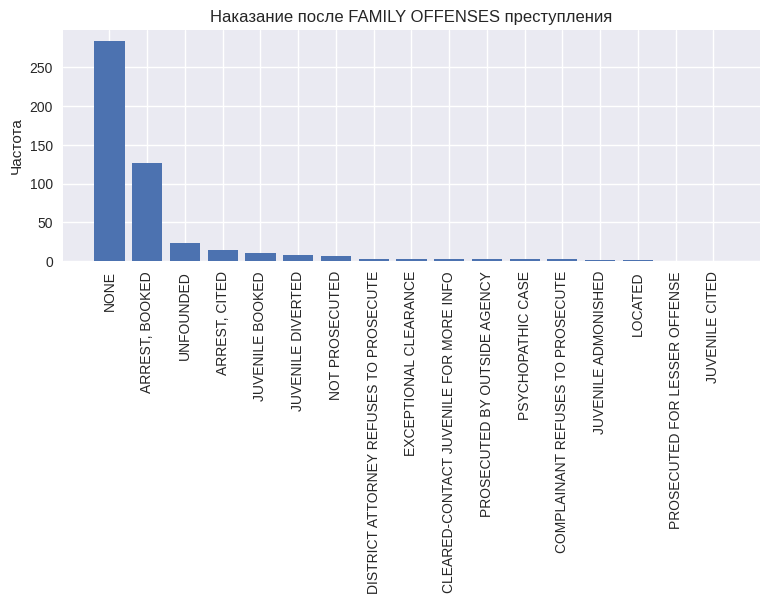

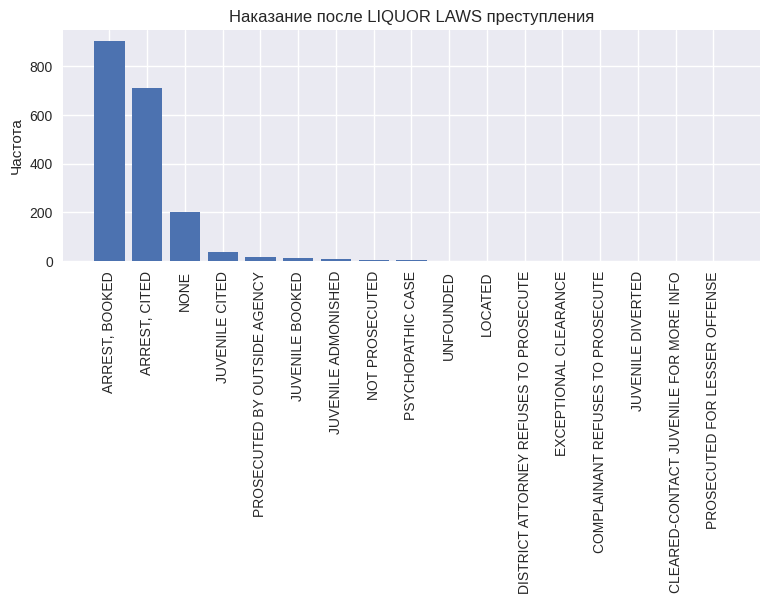

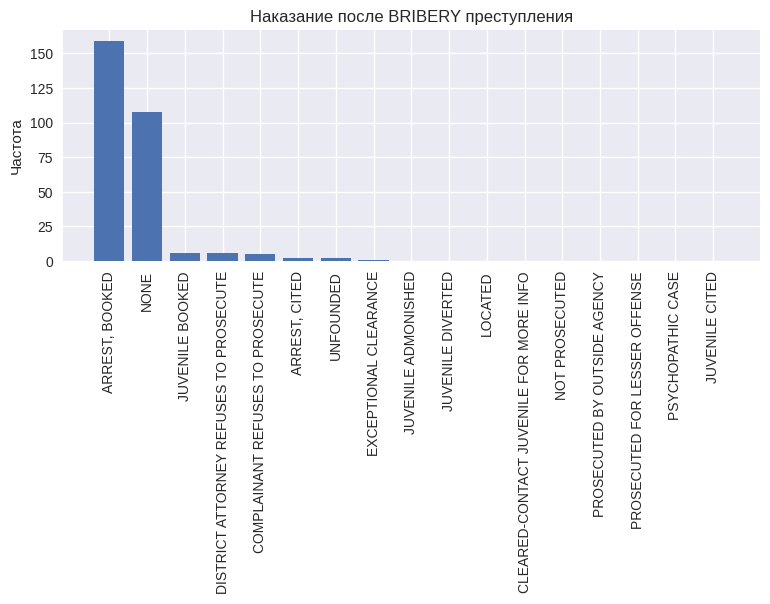

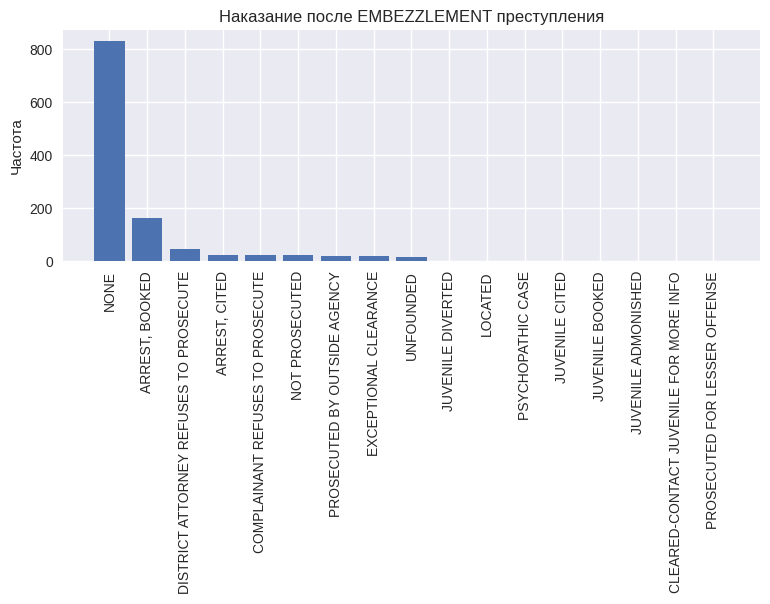

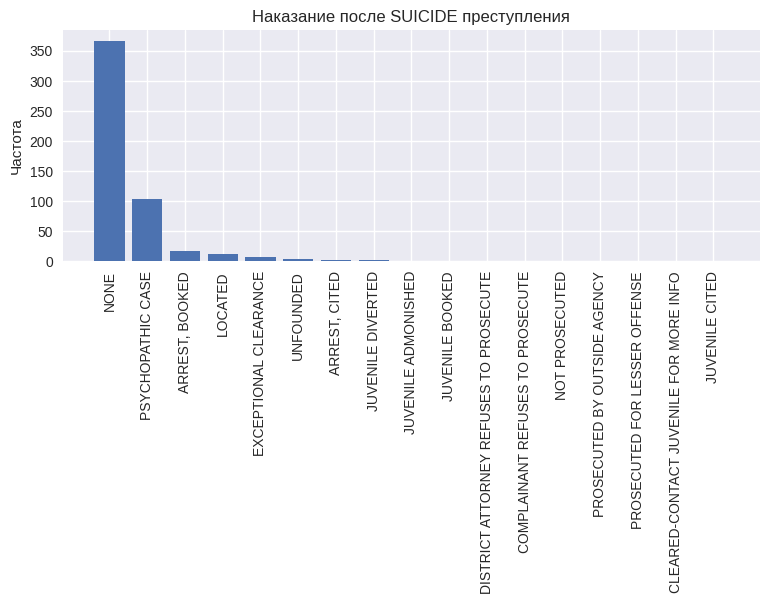

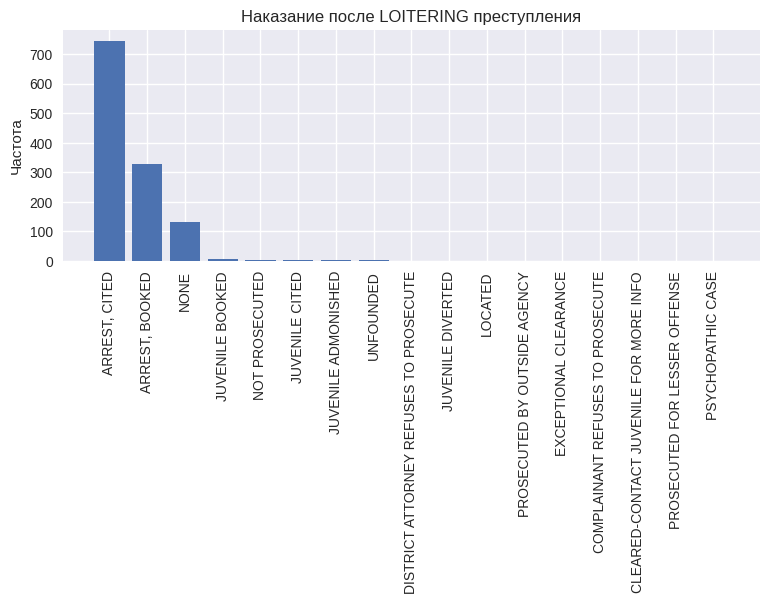

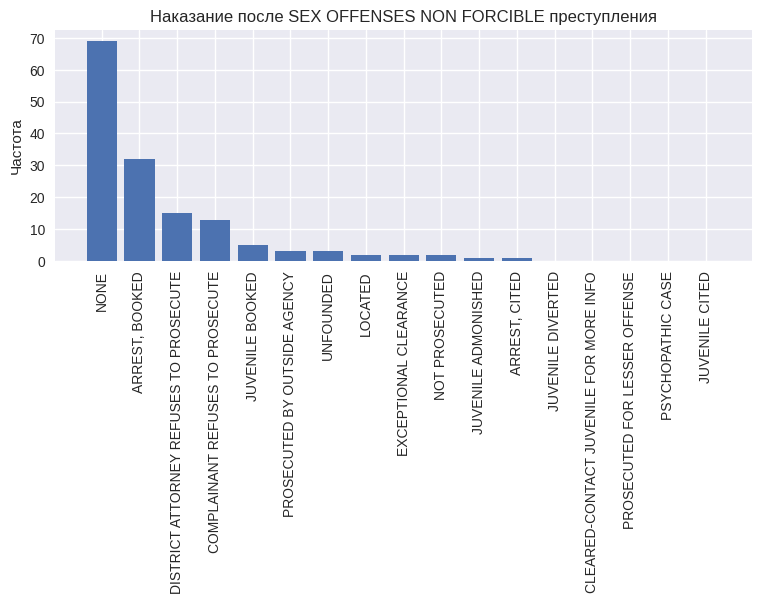

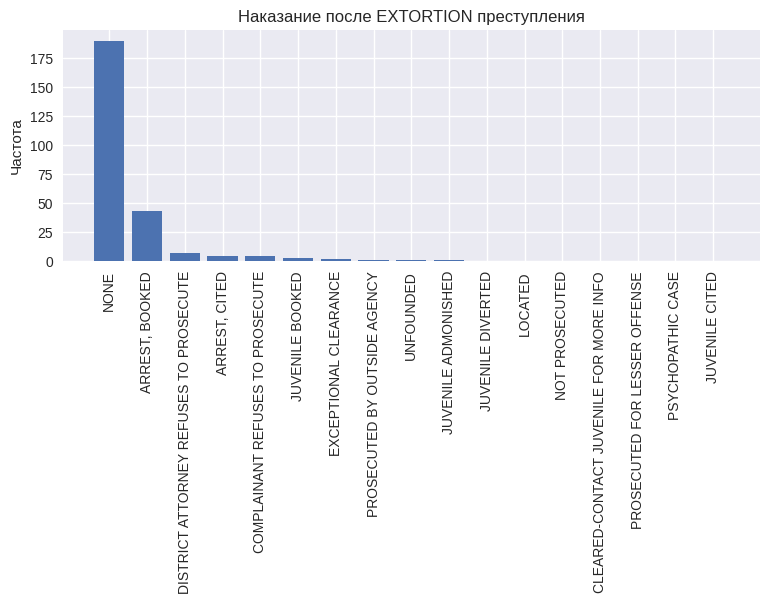

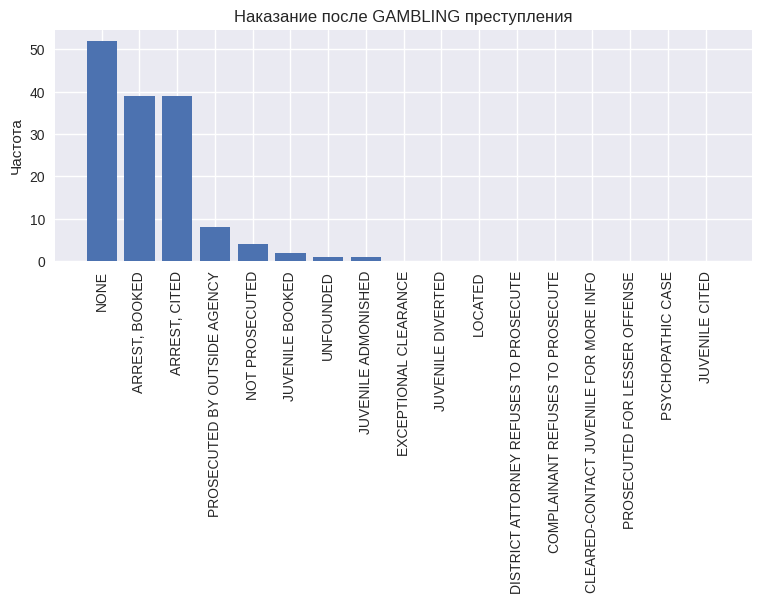

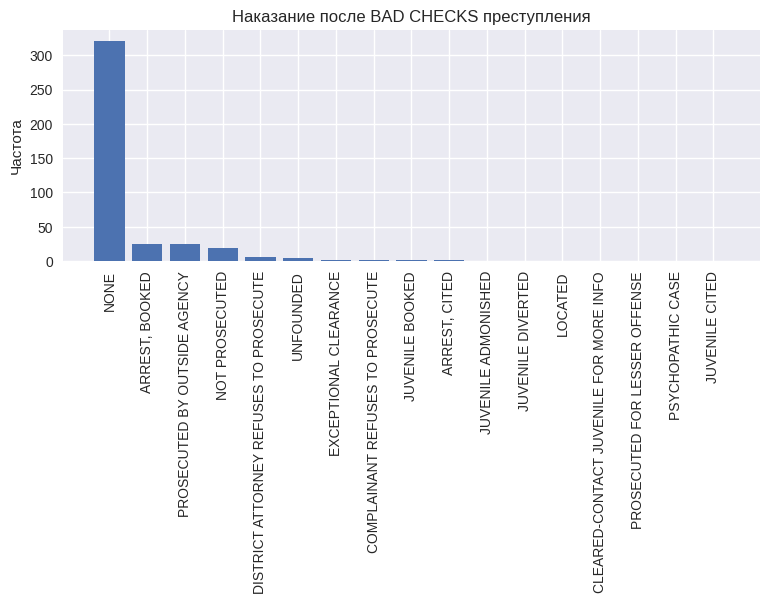

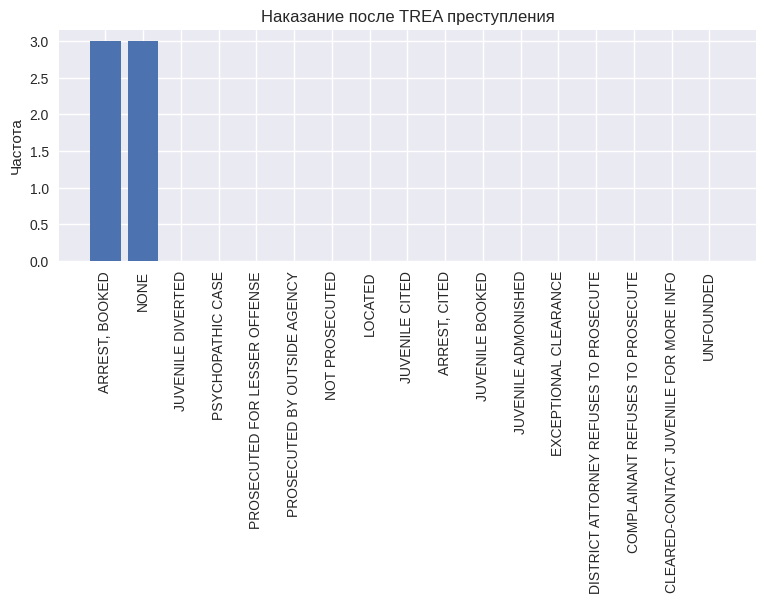

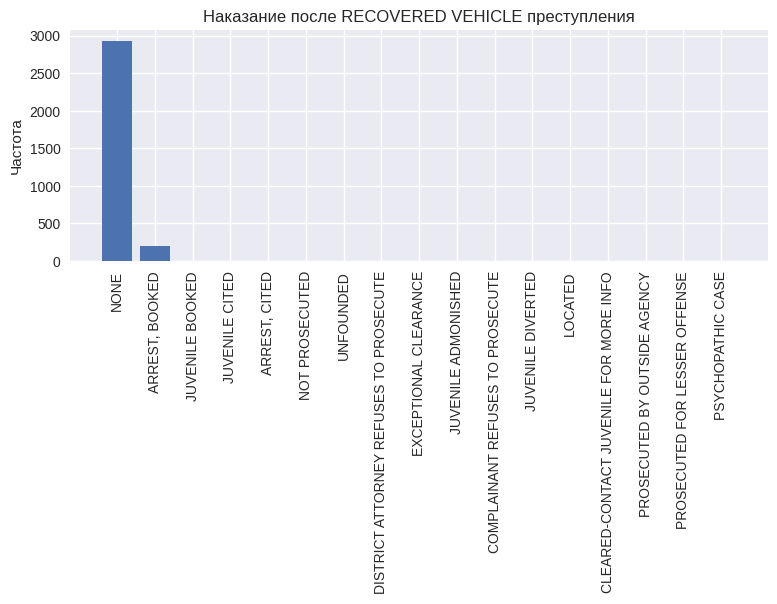

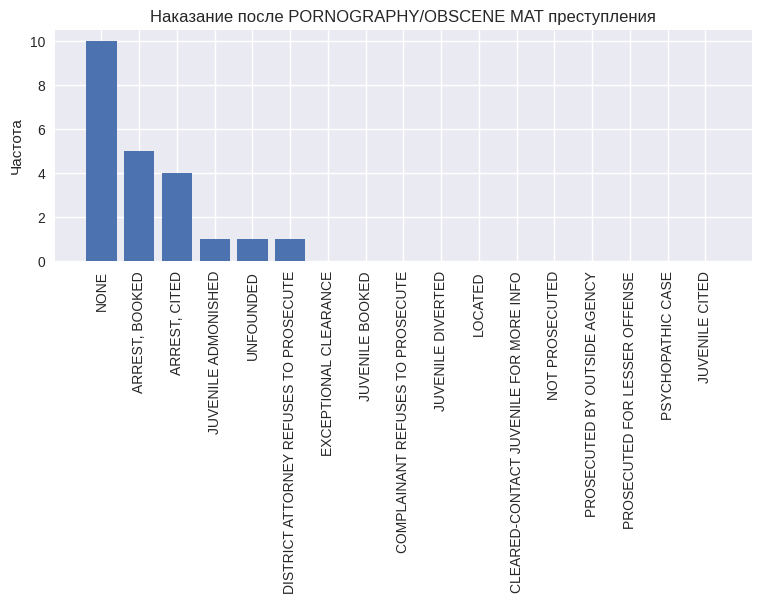

In [18]:
def count_plot(category_name):
    varValue=data[data["Category"]==category_name]["Resolution"].value_counts()

    #visualize
    pyplot.figure(figsize=(9,3))

    pyplot.bar(varValue.index,varValue)
    pyplot.xticks(varValue.index, varValue.index.values)
    pyplot.ylabel("Частота")
    pyplot.title("Наказание после {} преступления".format(category_name))
    pyplot.xticks(rotation=90)
    pyplot.show()

for i in list(data.Category.unique()):
    count_plot(i)

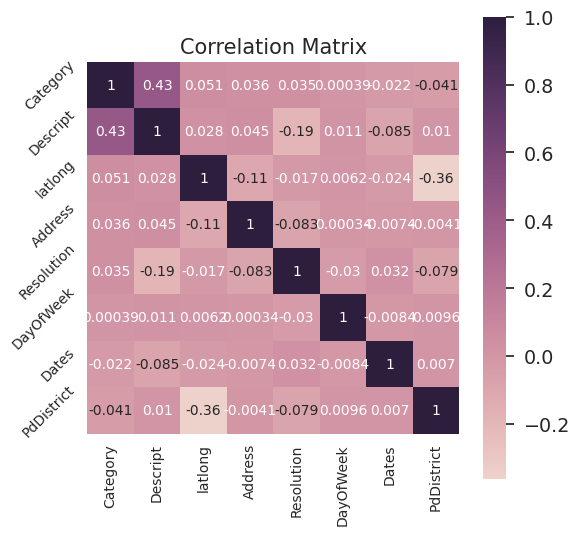

In [19]:
d = defaultdict(LabelEncoder)
sf_encode = data.apply(lambda x: d[x.name].fit_transform(x))
sf_encode = sf_encode.drop(['X', 'Y'], axis=1)

corrmat = sf_encode.corr()
f, ax = pyplot.subplots(figsize=(6, 6))


cmap1 = sns.cubehelix_palette(as_cmap=True)
k = 8
cols = corrmat.nlargest(k, 'Category')['Category'].index
cm = np.corrcoef(sf_encode[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,cmap=cmap1, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm.axes.set_title('Correlation Matrix')
pyplot.xticks(rotation=90)
pyplot.yticks(rotation=45)
pyplot.show()

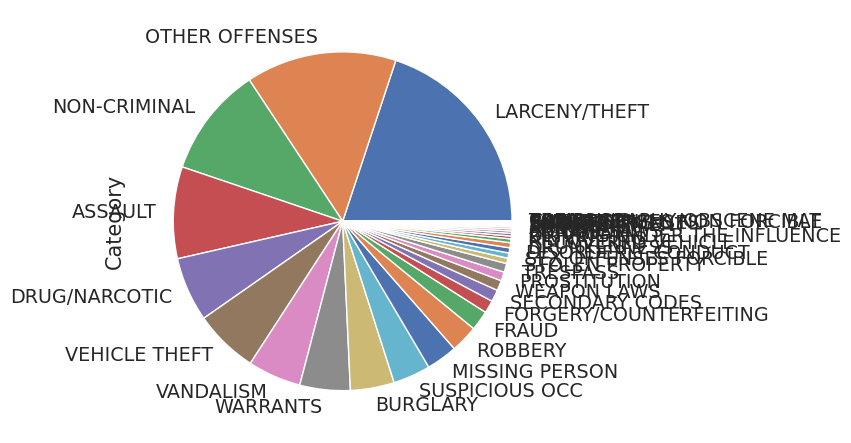

In [20]:
data["Category"].value_counts().plot.pie();

# Обработка категориальных признаков

Для всех объектов категориальный признак определён, пропущеных значений нет. Уменьшим количество классов, сделаем подходящие по смыслу в одну группу. Имеем следующие классы:

1. 'ARSON' (поджог),
2. 'ASSAULT' (нападение),
3. 'BAD CHECKS' (фальшивые чеки/подделка),
4. 'BRIBERY' (взяточничество),
5. 'BURGLARY' (кража со взломом),
6. 'DISORDERLY CONDUCT' (беспорядочное поведение),
7. 'DRIVING UNDER THE INFLUENCE' (вождение в нетрезвом виде),
8. 'DRUG/NARCOTIC' (наркотики),
9. 'DRUNKENNESS' (распитие),
10. 'EMBEZZLEMENT' (хращение, присвоение, хищение против собственности),
11. 'EXTORTION' (вымогательство),
12. 'FAMILY OFFENSES' (семейные преступления),
13. 'FORGERY/COUNTERFEITING' (фальш,контрафакция),
14. 'FRAUD' (мошенничество),
15. 'GAMBLING' (азартные игры),
16. 'KIDNAPPING' (похищение),
17. 'LARCENY/THEFT' (хищение, кража),
18. 'LIQUOR LAWS' (алкогольные законы),
19. 'LOITERING' (Праздношатание),
20. 'MISSING PERSON' (пропавший человек),
21. 'NON-CRIMINAL',
22. 'OTHER OFFENSES' (другие нарушения),
23. 'PORNOGRAPHY/OBSCENE MAT',
24. 'PROSTITUTION',
25. 'RECOVERED VEHICLE' (восст. тс),
26. 'ROBBERY' (ограбление),
27. 'RUNAWAY' (побег),
28. 'SECONDARY CODES' (вторичные коды),
29. 'SEX OFFENSES FORCIBLE',
30. 'SEX OFFENSES NON FORCIBLE',
31. 'STOLEN PROPERTY' (украденное имущество),
32. 'SUICIDE',
33. 'SUSPICIOUS OCC' (подозрительный случай),
34. 'TREA',
35. 'TRESPASS' (нарушение границ, вторжение),
36. 'VANDALISM' (вандализм),
37. 'VEHICLE THEFT' (угон тс),
38. 'WARRANTS' (ордера),
39. 'WEAPON LAWS' (законы об оружии)

ПЕРВАЯ КАТЕГОРИЯ (NON-CRIMINAL):
21. 'NON-CRIMINAL',

ВТОРАЯ КАТЕГОРИЯ (PART-SER-VIOL-LAW):
1. 'ARSON' (поджог),
2. 'ASSAULT' (нападение),
4. 'BRIBERY' (взяточничество),
5. 'BURGLARY' (кража со взломом),
8. 'DRUG/NARCOTIC' (наркотики),
10. 'EMBEZZLEMENT' (хращение, присвоение, хищение против собственности),
13. 'FORGERY/COUNTERFEITING' (фальш,контрафакция),
14. 'FRAUD' (мошенничество),
16. 'KIDNAPPING' (похищение),
26. 'ROBBERY' (ограбление),
31. 'STOLEN PROPERTY' (украденное имущество),
32. 'SUICIDE',
36. 'VANDALISM' (вандализм),
37. 'VEHICLE THEFT' (угон тс),
38. 'WARRANTS' (ордера),
39. 'WEAPON LAWS' (законы об оружии)

ТРЕТЬЯ КАТЕГОРИЯ (LIGHT-VIOL-LAW):
3. 'BAD CHECKS' (фальшивые чеки/подделка),
6. 'DISORDERLY CONDUCT' (беспорядочное поведение),
7. 'DRIVING UNDER THE INFLUENCE' (вождение в нетрезвом виде),
9. 'DRUNKENNESS' (распитие),
11. 'EXTORTION' (вымогательство),
12. 'FAMILY OFFENSES' (семейные преступления),
15. 'GAMBLING' (азартные игры),
17. 'LARCENY/THEFT' (хищение, кража),
18. 'LIQUOR LAWS' (алкогольные законы),
19. 'LOITERING' (Праздношатание),
27. 'RUNAWAY' (побег),
34. 'TREA',
35. 'TRESPASS' (нарушение границ, вторжение),

ЧЕТВЕРТАЯ КАТЕГОРИЯ (OTHER-OFFENSES):
25. 'RECOVERED VEHICLE' (восст. тс),
20. 'MISSING PERSON' (пропавший человек),
22. 'OTHER OFFENSES' (другие нарушения),
28. 'SECONDARY CODES' (вторичные коды),
33. 'SUSPICIOUS OCC' (подозрительный случай),

ПЯТАЯ КАТЕГОРИЯ (SEXUAL-LAW):
23. 'PORNOGRAPHY/OBSCENE MAT',
24. 'PROSTITUTION',
29. 'SEX OFFENSES FORCIBLE',
30. 'SEX OFFENSES NON FORCIBLE',

In [24]:
data['Category'] = data['Category'].astype('string')
# mapping1 = {'ARSON': "PART-SER-VIOL-LAW", 'ASSAULT': "PART-SER-VIOL-LAW", 'BRIBERY': "PART-SER-VIOL-LAW", 'BURGLARY': "PART-SER-VIOL-LAW",
#           "DRUG/NARCOTIC": "PART-SER-VIOL-LAW", 'EMBEZZLEMENT': "PART-SER-VIOL-LAW", "FORGERY/COUNTERFEITING": "PART-SER-VIOL-LAW",
#           'FRAUD': "PART-SER-VIOL-LAW", 'KIDNAPPING': "PART-SER-VIOL-LAW", 'ROBBERY': "PART-SER-VIOL-LAW", "STOLEN PROPERTY": "PART-SER-VIOL-LAW",
#           'SUICIDE': "PART-SER-VIOL-LAW", 'VANDALISM': "PART-SER-VIOL-LAW", "VEHICLE THEFT": "PART-SER-VIOL-LAW",
#           'WARRANTS': "PART-SER-VIOL-LAW", 'WEAPON LAWS': "PART-SER-VIOL-LAW", "LARCENY/THEFT": "LIGHT-VIOL-LAW", "BAD CHECKS": "LIGHT-VIOL-LAW", "DISORDERLY CONDUCT": "LIGHT-VIOL-LAW", "DRIVING UNDER THE INFLUENCE": "LIGHT-VIOL-LAW",
#            'DRUNKENNESS': "LIGHT-VIOL-LAW", 'EXTORTION': "LIGHT-VIOL-LAW", "FAMILY OFFENSES": "LIGHT-VIOL-LAW",
#            'GAMBLING': "LIGHT-VIOL-LAW", "LIQUOR LAWS": "LIGHT-VIOL-LAW", 'LOITERING': "LIGHT-VIOL-LAW", 'RUNAWAY': "LIGHT-VIOL-LAW",
#            'TREA': "LIGHT-VIOL-LAW", 'TRESPASS': "LIGHT-VIOL-LAW", "OTHER OFFENSES": "OTHER-OFFENSES", "RECOVERED VEHICLE": "OTHER-OFFENSES", "MISSING PERSON": "OTHER-OFFENSES",
#            "SECONDARY CODES": "OTHER-OFFENSES", "SUSPICIOUS OCC": "OTHER-OFFENSES","PORNOGRAPHY/OBSCENE MAT": "SEXUAL-LAW", "PROSTITUTION": "SEXUAL-LAW",
#            "SEX OFFENSES FORCIBLE": "SEXUAL-LAW", "SEX OFFENSES NON FORCIBLE": "SEXUAL-LAW"}

mapping1 = {'ARSON': "CRIMINAL", 'ASSAULT': "CRIMINAL", 'BRIBERY': "CRIMINAL", 'BURGLARY': "CRIMINAL",
           "DRUG/NARCOTIC": "CRIMINAL", 'EMBEZZLEMENT': "CRIMINAL", "FORGERY/COUNTERFEITING": "CRIMINAL",
           'FRAUD': "CRIMINAL", 'KIDNAPPING': "CRIMINAL", 'ROBBERY': "CRIMINAL", "STOLEN PROPERTY": "CRIMINAL",
           'SUICIDE': "CRIMINAL", 'VANDALISM': "CRIMINAL", "VEHICLE THEFT": "CRIMINAL",
           'WARRANTS': "CRIMINAL", 'WEAPON LAWS': "CRIMINAL", "LARCENY/THEFT": "CRIMINAL", "BAD CHECKS": "CRIMINAL", "DISORDERLY CONDUCT": "CRIMINAL", "DRIVING UNDER THE INFLUENCE": "CRIMINAL",
            'DRUNKENNESS': "CRIMINAL", 'EXTORTION': "CRIMINAL", "FAMILY OFFENSES": "CRIMINAL",
            'GAMBLING': "CRIMINAL", "LIQUOR LAWS": "CRIMINAL", 'LOITERING': "CRIMINAL", 'RUNAWAY': "CRIMINAL",
            'TREA': "CRIMINAL", 'TRESPASS': "CRIMINAL", "OTHER OFFENSES": "CRIMINAL", "RECOVERED VEHICLE": "CRIMINAL", "MISSING PERSON": "CRIMINAL",
            "SECONDARY CODES": "CRIMINAL", "SUSPICIOUS OCC": "CRIMINAL","PORNOGRAPHY/OBSCENE MAT": "CRIMINAL", "PROSTITUTION": "CRIMINAL",
            "SEX OFFENSES FORCIBLE": "CRIMINAL", "SEX OFFENSES NON FORCIBLE": "CRIMINAL", "PCRIMINAL": "CRIMINAL"}

data['Category'] = data['Category'].map(mapping1).fillna(data['Category'])
data['Category'] = data['Category'].astype('category')
data

Dates  Category  \
0       2015-05-13 23:53:00  CRIMINAL   
1       2015-05-13 23:53:00  CRIMINAL   
2       2015-05-13 23:33:00  CRIMINAL   
3       2015-05-13 23:30:00  CRIMINAL   
4       2015-05-13 23:30:00  CRIMINAL   
...                     ...       ...   
878044  2003-01-06 00:15:00  CRIMINAL   
878045  2003-01-06 00:01:00  CRIMINAL   
878046  2003-01-06 00:01:00  CRIMINAL   
878047  2003-01-06 00:01:00  CRIMINAL   
878048  2003-01-06 00:01:00  CRIMINAL   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  \
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414   
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873   
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541   
...                ...                         ...         ...        ...   
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056   
878045            NONE        600 Block of EDNA ST -122.447364  37.731948   
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266   
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607   
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212   

            latlong  
0      -4624.588916  
1      -4624.588916  
2      -4627.691645  
3      -4627.847257  
4      -4624.699819  
...             ...  
878044 -4618.426865  
878045 -4620.177499  
878046 -4624.432596  
878047 -4623.988577  
878048 -4618.965598  

[878049 rows x 10 columns]

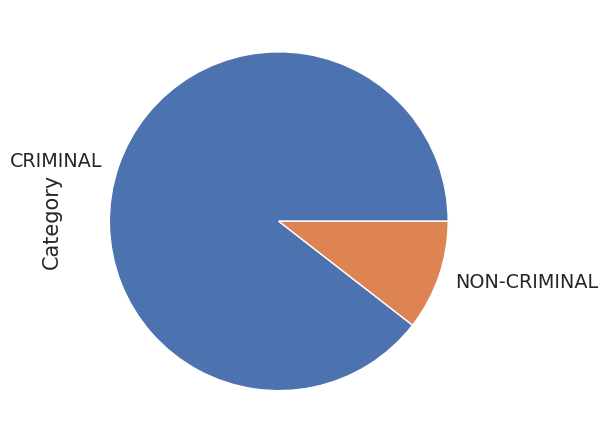

In [25]:
data["Category"].value_counts().plot.pie();

# Нормализация количественных признаков

In [26]:
#normalization = [i for i in data.columns if i != 'Category' and i != 'Descript' and i != 'Resolution']
#data_normal = (data[normalization] - data[normalization].mean(axis = 0))/data[normalization].std(axis = 0)
#data_normal.describe()

from sklearn import preprocessing as prepro
for i in ['Category','Descript','DayOfWeek','PdDistrict','Resolution','Address','latlong']:
    data[i] = prepro.LabelEncoder().fit_transform(data[i])

#data['year'] = pandas.to_datetime(data['Dates']).dt.year
#data['month'] = pandas.to_datetime(data['Dates']).dt.month
#data['day'] = pandas.to_datetime(data['Dates']).dt.day
#data['hour'] = pandas.to_datetime(data['Dates']).dt.hour
#data['minute'] = pandas.to_datetime(data['Dates']).dt.minute

# Исключаем столбец классов из данных
classes = data["Category"]
descripts = data["Descript"]
resolutions = data["Resolution"]
data = data.drop("Category", axis=1)
data = data.drop("Descript", axis=1)
data = data.drop("Resolution", axis=1)
data = data.drop("Dates", axis=1)
data.drop(['X','Y'], axis='columns', inplace=True)

normalized = data - data.mean(axis=0)
normalized = normalized / data.std(axis=0)
normalized.head(5)

print(data)
print(normalized.head(5))

        DayOfWeek  PdDistrict  Address  latlong
0               6           4    19790    12609
1               6           4    19790    12609
2               6           4    22697     1999
3               6           4     4266     1571
4               6           5     1843    12206
...           ...         ...      ...      ...
878044          1           8    15816    29874
878045          1           2    11491    25037
878046          1           7    11315    13199
878047          1           7    22308    14848
878048          1           0     5128    28278

[878049 rows x 4 columns]
   DayOfWeek  PdDistrict   Address   latlong
0   1.485498   -0.155501  1.702740 -0.308462
1   1.485498   -0.155501  1.702740 -0.308462
2   1.485498   -0.155501  2.182785 -1.536631
3   1.485498   -0.155501 -0.860804 -1.586174
4   1.485498    0.193696 -1.260924 -0.355112


In [ ]:
#print(normalized.head(5))

# Разбиение на обучающую и тестовую выборку

Разобьем данные по правилу 80 на 20

In [27]:
# from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(data,
#                                                    classes,
#                                                    test_size = 0.2,
#                                                    random_state = 42)

#print("X", "train:", x_train.shape, "test:", x_test.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized,
                                                    classes,
                                                    test_size = 0.2,
                                                    random_state = 42)

print("X", "train:", x_train.shape, "test:", x_test.shape)

X train: (702439, 4) test: (175610, 4)


# Классификация. Метод k ближайших соседей. Подбор параметра k. Вычисление ошибок

In [31]:
%%time
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 31, 5):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train.values, y_train.values)
    y_train_pred = model.predict(x_train.values)
    y_test_pred = model.predict(x_test.values)
    print("---")
    print("K: {}, Train: {}, Test: {}".format(k, sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))


---
K: 1, Train: 0.13388208798201695, Test: 0.17258698251807983
---
K: 6, Train: 0.10443469112620456, Test: 0.10718068447127156
---
K: 11, Train: 0.10472937863643676, Test: 0.10622401913330676
---
K: 16, Train: 0.10465819807840966, Test: 0.10527304823187746
---
K: 21, Train: 0.10471656613599188, Test: 0.10529582597801948
---
K: 26, Train: 0.10466816335653345, Test: 0.1049598542224247
CPU times: user 8min 53s, sys: 13 s, total: 9min 6s
Wall time: 9min 4s


# Случайный лес

In [28]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.09116521149879206, Test: 0.11737942030636069
CPU times: user 2min 49s, sys: 545 ms, total: 2min 49s
Wall time: 2min 55s


# SVM.SVC классификатор

In [ ]:
%%time
from sklearn.svm import SVC

model = SVC()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

#Gradient Boosting

In [30]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=10, max_depth=6)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.10506819809264577, Test: 0.10534707590683902
CPU times: user 15.5 s, sys: 22.1 ms, total: 15.5 s
Wall time: 17.2 s


# Классификатор дерева решений

In [29]:
%%time
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.09115809344298935, Test: 0.1189340014805535
CPU times: user 4.21 s, sys: 46.3 ms, total: 4.26 s
Wall time: 6.4 s


# Выводы

Наилучший показатель точности был при "Методе 26 ближайших соседей", показав ошибку на тестовой выборке 0.1049598542224247, похожий результат при методе случайного леса.

Задачу подразбил на два класса: CRIMINAL (было преступление), NON-CRIMINAL (не было). При разбитии класса на 5 классов возникли трудности, ошибка была очень высока, не получилось уменьшить.